In [102]:
from src.utils import Triangle, Vertex
from src.constraints import Simplicial2DConstraint, PDConstraint
from src.solver import ProjectiveDynamicsSolver

import numpy as np
from scipy.spatial.transform import Rotation

In [238]:
vertices = [
    Vertex(
        position=np.array([1.0, 0.0, 0.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
    Vertex(
        position=np.array([3.0, 0.0, 0.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
    Vertex(
        position=np.array([1.0, 3.0, 3.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
    Vertex(
        position=np.array([3.0, 4.0, 4.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
]

triangles = [
    Triangle(0, 1, 2),
    Triangle(0, 1, 3),
]

In [240]:
rotation = Rotation.from_euler('x', 45, degrees=True)

constraints: list[PDConstraint] = [
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
]

In [241]:
import matplotlib.pyplot as plt

In [242]:
solver = ProjectiveDynamicsSolver(
    vertices,
    constraints,
    0.1
)

ValueError: operands could not be broadcast together with shapes (8,8) (4,4) 

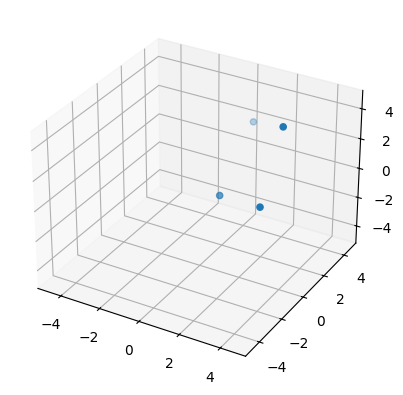

In [227]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(solver.q[:, 0], solver.q[:, 1], solver.q[:, 2], marker="o")

In [233]:
for _ in range(200):
    solver.perform_step(200)

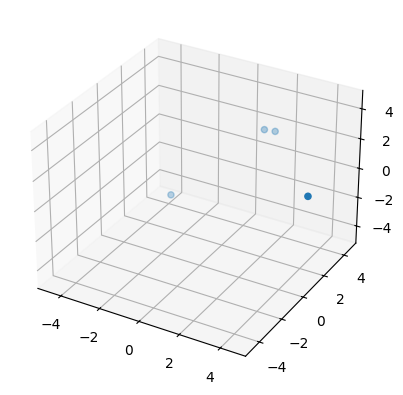

In [234]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(solver.q[:, 0], solver.q[:, 1], solver.q[:, 2], marker="o")

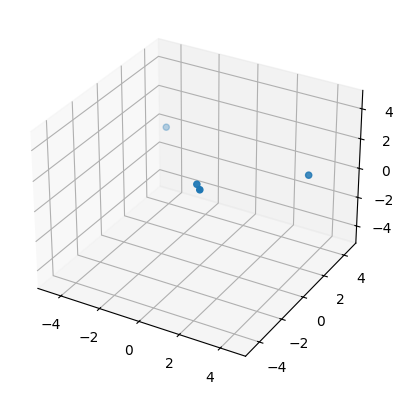

In [235]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(constraints[0].initial_positions[:, 1], constraints[0].initial_positions[:, 2], marker="o")

In [236]:
import scipy as sp
sp.spatial.distance.pdist(constraints[0].initial_positions)

array([5.        , 0.5       , 6.        , 5.02493781, 7.81024968,
       5.5       ])

In [237]:
sp.spatial.distance.pdist(solver.q)

array([5.02343526, 0.49925568, 5.80327269, 5.14799356, 7.31871856,
       5.51385082])

In [204]:
mapped_vertices

NameError: name 'mapped_vertices' is not defined